<a href="https://colab.research.google.com/github/ArijeetGoswami/INSURANCE-PREDICTION/blob/main/student_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [248]:
#installing dependecies for data-visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [249]:
#for the machine learining model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

plt.style.use('ggplot')

In [250]:
#lets import the data
df = pd.read_csv('/content/student-scores.csv')
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [251]:
#lets see more informatio of the data-set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [252]:
#lets check for the nul values of the data-set
df.isnull().sum()

,0
id,0
first_name,0
last_name,0
email,0
gender,0
part_time_job,0
absence_days,0
extracurricular_activities,0
weekly_self_study_hours,0
career_aspiration,0


In [253]:
#lets check description of the data-set--> count,mean,std,min
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [254]:
#data cleaning
#lets 1st merge the subject-columns score in the df data-set into 1 column
df['total_score']=(df['math_score']+df['history_score']+df['physics_score']+df['biology_score']+df['english_score']+df['geography_score'])
#now lest calculate the average
df['total_score']=df['total_score']/7
#print
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,68.142857
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,77.142857
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,72.714286
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86,67.285714
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,65.142857


In [255]:
#lets drop the per subject cloumns
df.drop(['math_score','history_score','physics_score','biology_score','english_score','geography_score'],axis=1,inplace=True)

In [256]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,chemistry_score,total_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,97,68.142857
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,100,77.142857
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,96,72.714286
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,80,67.285714
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,65,65.142857


In [257]:
#lets drop teh chemistry score
df.drop(['chemistry_score','first_name'],axis=1,inplace=True)

In [258]:
df.head()

,id,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,total_score
0,1,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,68.142857
1,2,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,77.142857
2,3,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,72.714286
3,4,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,67.285714
4,5,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,65.142857


In [259]:
#lets again filter the data- in the data-set--> last_name, email
df.drop(['last_name','email'],axis=1,inplace=True)
df

,id,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,total_score
0,1,male,False,3,False,27,Lawyer,68.142857
1,2,female,False,2,False,47,Doctor,77.142857
2,3,female,False,9,True,13,Government Officer,72.714286
3,4,female,False,5,False,3,Artist,67.285714
4,5,male,False,5,False,10,Unknown,65.142857
...,...,...,...,...,...,...,...,...
1995,1996,male,False,2,False,30,Construction Engineer,69.285714
1996,1997,male,False,2,False,20,Software Engineer,64.857143
1997,1998,female,False,5,False,14,Software Engineer,69.285714
1998,1999,female,True,10,True,5,Business Owner,68.142857


In [260]:
#lest do encoding for the part_time_job, extrciricular_activities, gender(male-->0,female-->1)
df['gender']=df['gender'].replace({'male':0,'female':1})

#as contain true and false
df['part_time_job']=df['part_time_job'].astype(int)
df['extracurricular_activities']=df['extracurricular_activities'].astype(int)
df.head()


,id,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,total_score
0,1,0,0,3,0,27,Lawyer,68.142857
1,2,1,0,2,0,47,Doctor,77.142857
2,3,1,0,9,1,13,Government Officer,72.714286
3,4,1,0,5,0,3,Artist,67.285714
4,5,0,0,5,0,10,Unknown,65.142857


<Axes: xlabel='gender', ylabel='total_score'>

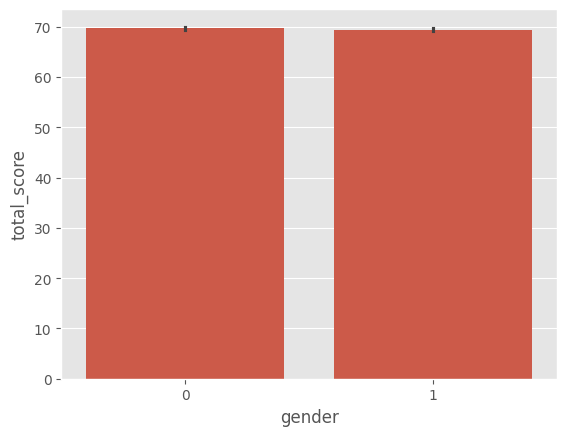

In [261]:
#lets have a bar plotting    chacking the score difference between male and female student
sns.barplot(x='gender',y='total_score',data=df)

<Axes: xlabel='career_aspiration'>

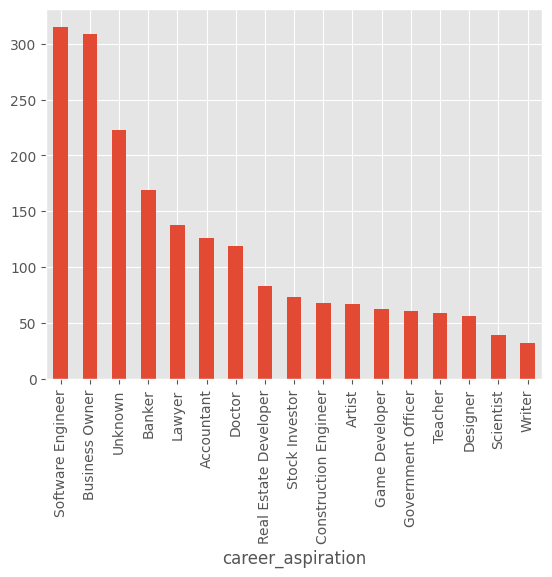

In [262]:
#lets focus on the carrer_aspiration column
df['career_aspiration'].value_counts().plot(kind='bar')

In [263]:
X = df.drop(columns = 'total_score')
y = df['total_score']

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2000 non-null   int64  
 1   gender                      2000 non-null   int64  
 2   part_time_job               2000 non-null   int64  
 3   absence_days                2000 non-null   int64  
 4   extracurricular_activities  2000 non-null   int64  
 5   weekly_self_study_hours     2000 non-null   int64  
 6   career_aspiration           2000 non-null   object 
 7   total_score                 2000 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 125.1+ KB


In [265]:
#convert the career_aspiration to int data-type
#utlizing label encoder
labelencoder = LabelEncoder()
df['career_aspiration'] = labelencoder.fit_transform(df['career_aspiration'])

In [266]:
df.head()

,id,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,total_score
0,1,0,0,3,0,27,9,68.142857
1,2,1,0,2,0,47,6,77.142857
2,3,1,0,9,1,13,8,72.714286
3,4,1,0,5,0,3,1,67.285714
4,5,0,0,5,0,10,15,65.142857


In [267]:
#LETS FOCUS ON THE ML MODEL VIA XGBRegressor

In [268]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [269]:
#here we are defiining the x and y value
X = df.drop(columns = 'total_score')
y = df['total_score']


#importing the train_test_split model for the data-set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)



#defined parameters for the model
best_params = {'n_estimators': 439,
    'max_depth': 3,
    'learning_rate': 0.017629084511653136,
    'subsample': 0.9713755557379617,
    'colsample_bytree': 0.7354143949346962,
    'reg_alpha': 8.318950808630586,
    'reg_lambda': 7.638009786115094}


#fitting the model
xgb_best = XGBRegressor(**best_params)
xgb_best.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7354143949346962, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.017629084511653136, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=439, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [270]:
#lets have prediction on test set
y_predict=xgb_best.predict(X_test)

In [271]:
#lets have the mean_squared_error value
RMSE = np.sqrt(mean_squared_error(y_test,y_predict))
RMSE

3.874649715493091

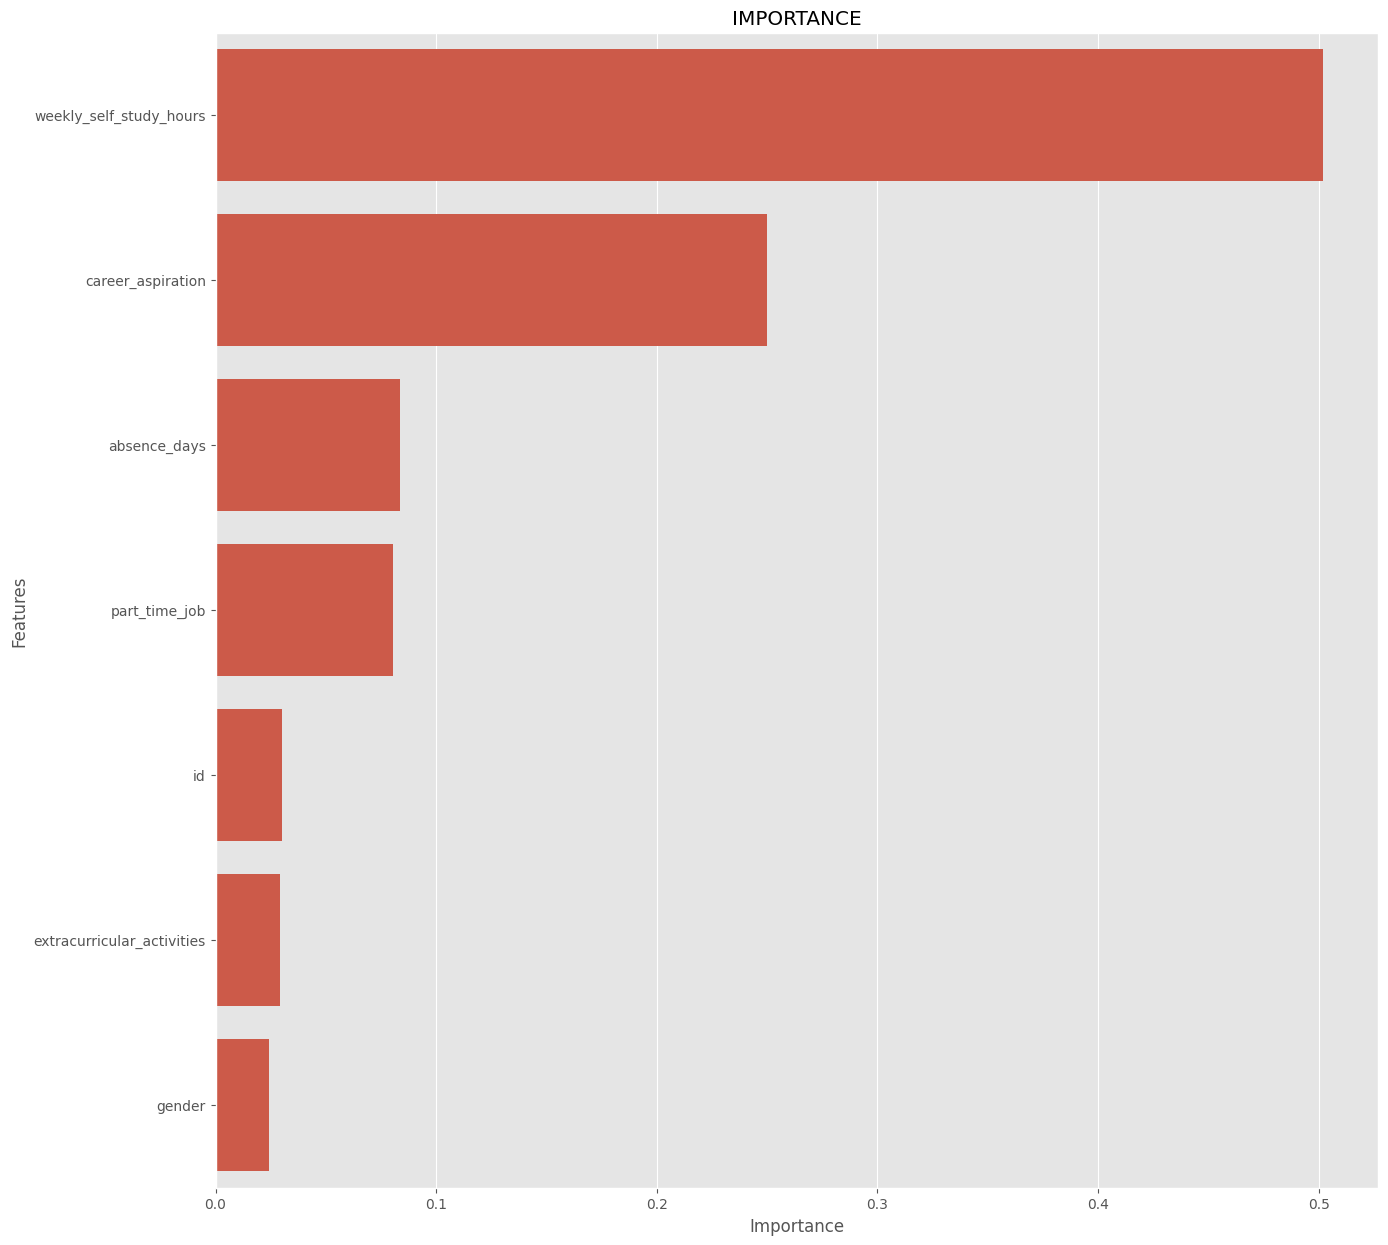

In [281]:
def plot_feature_name(model, feature_name=None,top_n=10,plot=True):
    feature_importance = model.feature_importances_
    if feature_name is None:
        feature_name = model.feature_name()

    feature_importance_df1 = pd.DataFrame({'Features':feature_name,'Importance':feature_importance})
    #sorting the values
    feature_importance_df1 = feature_importance_df1.sort_values(by='Importance',ascending=False).head(top_n)
    if plot:
      plt.figure(figsize=(15,15))
      sns.barplot(x='Importance',y='Features',data=feature_importance_df1)
      plt.title('IMPORTANCE')
      plt.show()


    return feature_importance_df1

feature_importance_df1 = plot_feature_name(xgb_best,feature_name=X.columns)